In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn import metrics
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [263]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=16
fig_size[1]=14
sns.set_context("talk")   

In [264]:
df = pd.read_csv("C:/Users/suer/Dropbox/job/sweat.csv", engine='python')

In [265]:
df = df.replace(9999, np.NaN)
#df.fillna(df.mean(), inplace=True)
df.dropna(axis=0, how='any', inplace=True)

In [266]:
df.head()

,프로그램명,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여,학과,연령,학년,성별
0,One-day 입사사류,1.0,1,1.0,1,1,3,건축학과,21.0,3.0,2.0
1,One-day 입사사류,1.0,1,1.0,1,1,3,건축학과,24.0,4.0,2.0
2,One-day 입사사류,1.0,1,1.0,1,1,3,건축학과,24.0,4.0,1.0
3,One-day 입사사류,1.0,1,1.0,1,1,3,건축학과,25.0,4.0,1.0
4,One-day 입사사류,1.0,1,1.0,1,1,1,건축학과,23.0,4.0,1.0


In [267]:
score = {1:5,2:4,3:3,4:2,5:1}
df['만족도'] = df['만족도'].map(score)
df['유익성'] = df['유익성'].map(score)
df['진행자'] = df['진행자'].map(score)
df['진로취업도움'] = df['진로취업도움'].map(score)
df['커리큘럼적정성'] = df['커리큘럼적정성'].map(score)

In [268]:
grpdf = df.groupby('프로그램명').mean()

In [269]:
grpdf

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,연령,학년,성별
프로그램명,,,,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556,21.500000,2.666667,1.222222
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778,20.833333,2.333333,1.083333
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429,22.760504,3.966387,1.464286
e-Test,4.864407,4.813559,4.864407,4.745763,4.745763,25.101695,3.644068,1.389831
공모전을 취업에 활용하기,4.310000,4.280000,4.540000,4.240000,4.220000,20.330000,2.070000,1.470000
데일카네기 리더십캠프,4.611111,4.543210,4.734568,4.462963,4.469136,19.141975,1.413580,1.481481
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826,20.086957,2.173913,1.608696
무역실무,4.166667,4.388889,4.277778,4.055556,4.666667,20.777778,2.277778,1.833333
여대생 취업 DNA를 깨워라,4.130000,4.100000,4.250000,4.110000,4.020000,19.930000,2.480000,2.000000


In [270]:
df.groupby('성별').mean()

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,연령,학년
성별,,,,,,,
1.0,4.494786,4.513326,4.593279,4.476246,4.468134,21.871379,2.721900
2.0,4.372881,4.392252,4.524213,4.331719,4.355932,20.375303,2.525424


In [291]:
(df.groupby('학년').mean()).sort_values(by='만족도', ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,연령,성별
학년,,,,,,,
4.0,4.546531,4.607445,4.680203,4.588832,4.566836,23.011844,1.458545
1.0,4.400881,4.403084,4.544053,4.323789,4.361233,18.585903,1.577093
2.0,4.374603,4.320635,4.495238,4.285714,4.330159,20.307937,1.441270
3.0,4.340426,4.376900,4.425532,4.303951,4.288754,22.097264,1.468085


In [271]:
depmean = df.groupby('학과').mean()
depmean.sort_values(by=['만족도', '유익성','진행자'], ascending=False)

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,연령,학년,성별
학과,,,,,,,,
국어교육과,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,3.000000,2.000000
유통경영정보,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,4.000000,1.000000
지리교육과,5.000000,5.000000,5.000000,5.000000,5.000000,24.000000,4.000000,1.000000
교육학과,4.888889,4.888889,4.888889,4.888889,4.777778,21.888889,4.000000,1.666667
영어교육과,4.888889,4.777778,4.888889,4.777778,4.888889,23.222222,4.000000,1.333333
경영학과,4.818182,4.545455,4.772727,4.545455,4.454545,24.090909,3.590909,1.272727
화장품학부,4.697674,4.627907,4.790698,4.453488,4.453488,19.790698,1.930233,1.697674
융합보안학과,4.692308,4.615385,4.692308,4.538462,4.538462,20.461538,2.153846,1.230769
제약공학과,4.692308,4.538462,4.692308,4.615385,4.769231,23.538462,3.538462,1.461538


In [272]:
grpdf = grpdf.iloc[:,:-3]

In [273]:
corr = grpdf.corr()

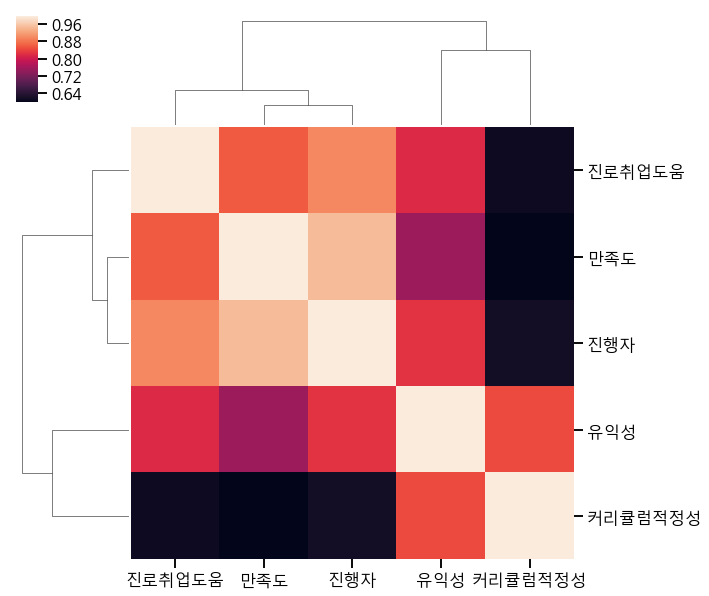

In [274]:
sns.clustermap(corr)

In [275]:
grpdf['합계'] = 0 
#grpdf['합계'] = grpdf['만족도'] + grpdf['유익성'] + grpdf['진행자'] + grpdf['진로취업도움'] + grpdf['커리큘럼적정성']
sumcol = ['만족도', '유익성', '진행자', '진로취업도움', '커리큘럼적정성']
for x in sumcol:
    grpdf['합계'] += grpdf[x]

C:\Users\suer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\suer\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [276]:
grpdf

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,합계
프로그램명,,,,,,
CAP+,4.722222,4.833333,4.833333,4.611111,4.555556,23.555556
NCS기반 취업완전정복특강,4.638889,4.472222,4.638889,4.527778,4.527778,22.805556
One-day 입사사류,4.577731,4.613445,4.701681,4.615546,4.571429,23.079832
e-Test,4.864407,4.813559,4.864407,4.745763,4.745763,24.033898
공모전을 취업에 활용하기,4.310000,4.280000,4.540000,4.240000,4.220000,21.590000
데일카네기 리더십캠프,4.611111,4.543210,4.734568,4.462963,4.469136,22.820988
모의경영을 퉁한 직무설정,4.391304,4.347826,4.434783,4.000000,4.347826,21.521739
무역실무,4.166667,4.388889,4.277778,4.055556,4.666667,21.555556
여대생 취업 DNA를 깨워라,4.130000,4.100000,4.250000,4.110000,4.020000,20.610000


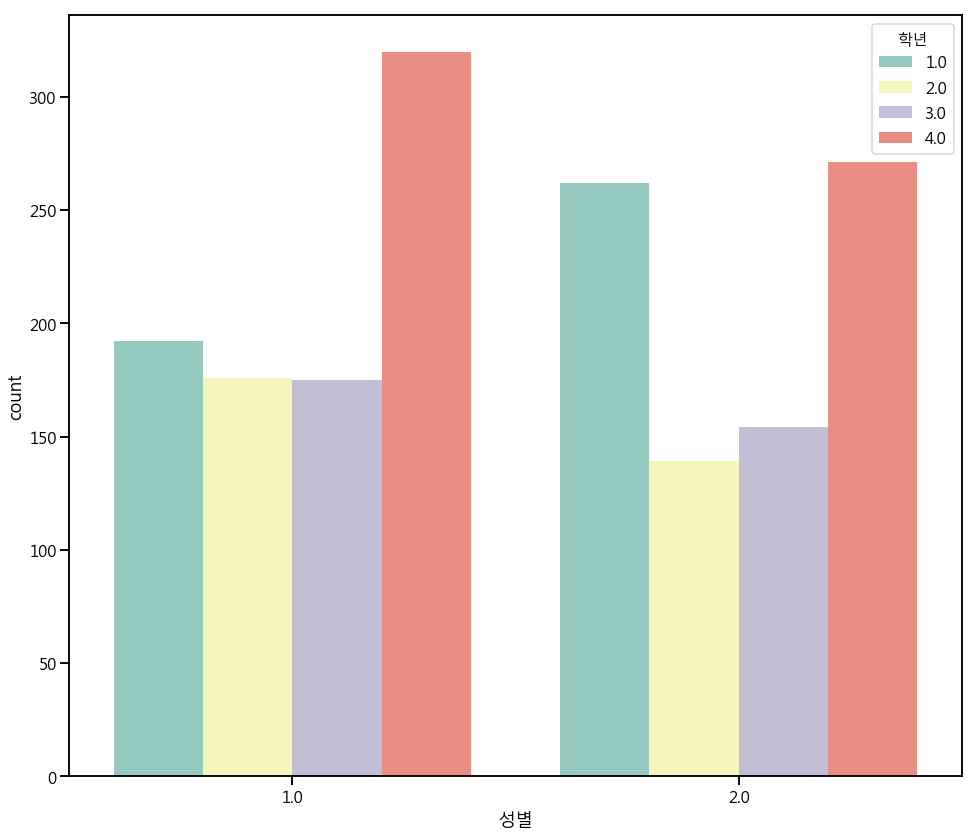

In [277]:
sns.countplot(x='성별',data=df, hue='학년', palette='Set3')

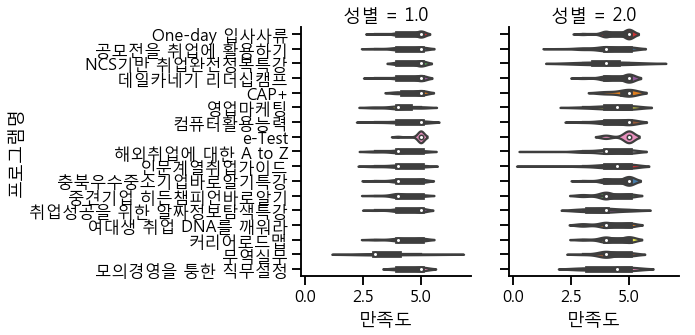

In [278]:
sns.catplot(y='프로그램명', x='만족도', col='성별', data=df, kind='violin', palette="Set1")

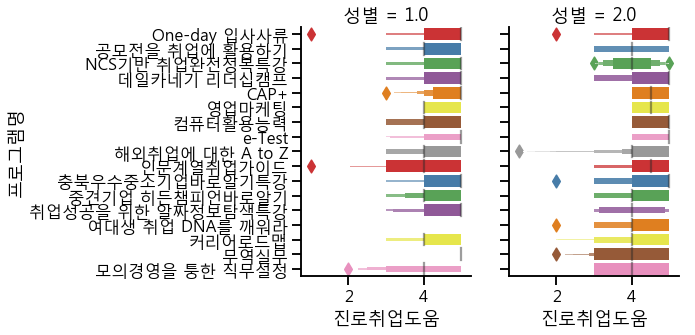

In [279]:
sns.catplot(y='프로그램명', x='진로취업도움', col='성별', data=df, kind='boxen', palette="Set1")

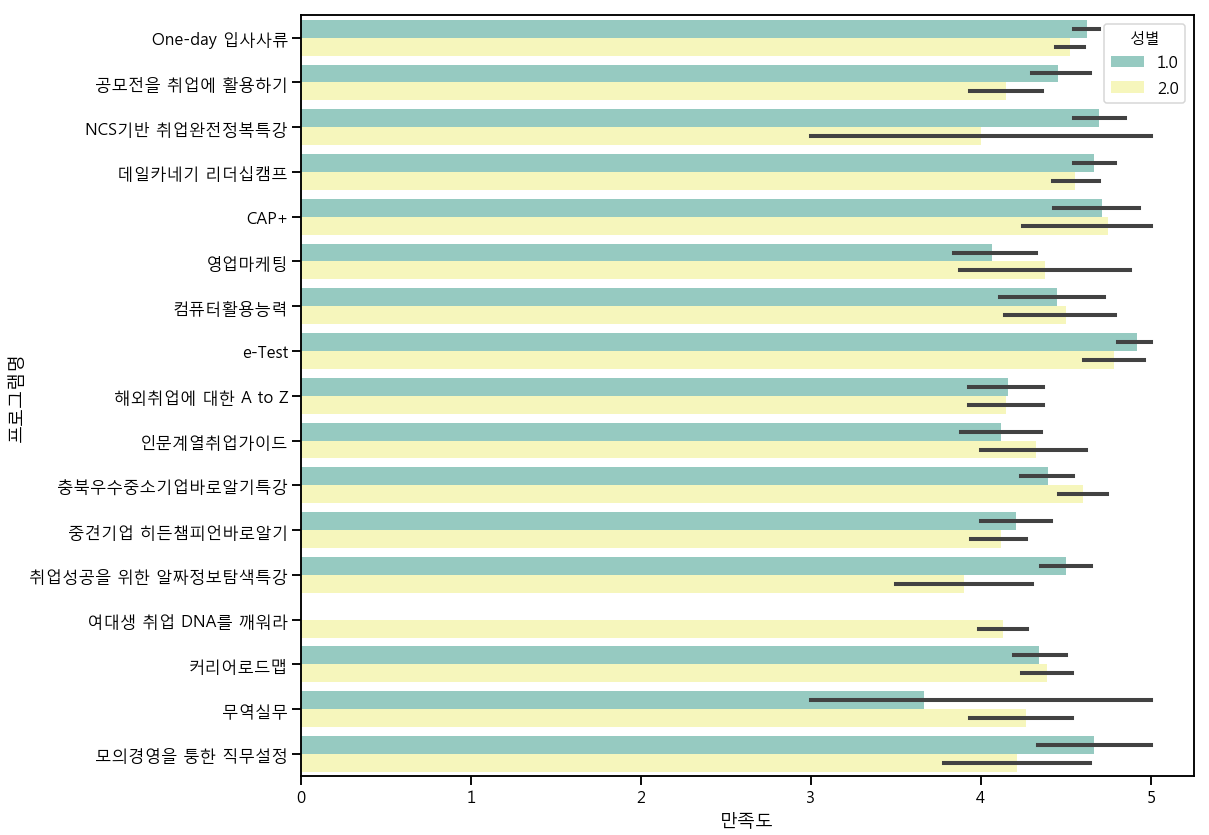

In [280]:
sns.barplot(x='만족도',y='프로그램명',data=df, hue='성별',palette='Set3')

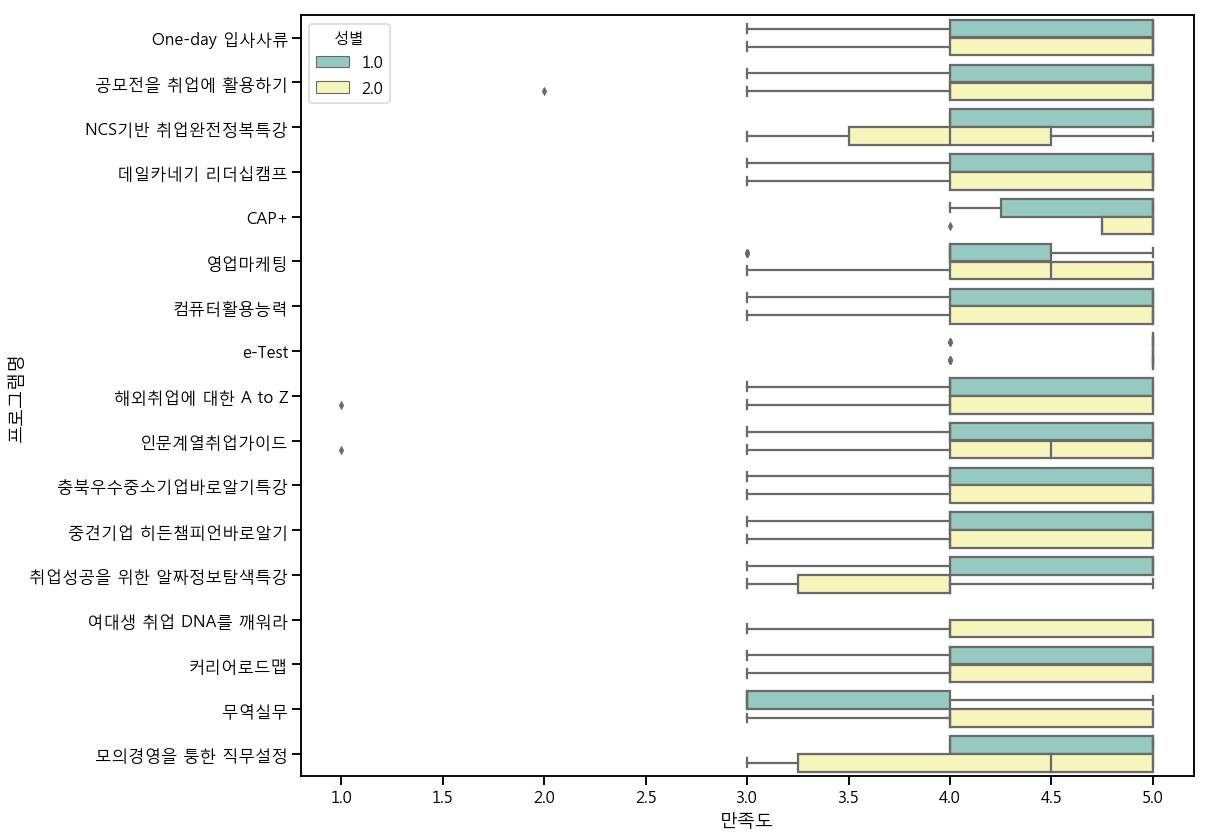

In [281]:
sns.boxplot(x='만족도',y='프로그램명',data=df, hue='성별', palette='Set3')

In [282]:
dfval = df.iloc[:,1:-4]

In [283]:
df['프로그램명'].value_counts()

One-day 입사사류         476
데일카네기 리더십캠프          162
커리어로드맵               143
충북우수중소기업바로알기특강       141
공모전을 취업에 활용하기        100
여대생 취업 DNA를 깨워라      100
해외취업에 대한 A to Z       99
중견기업 히든챔피언바로알기        97
취업성공을 위한 알짜정보탐색특강     78
인문계열취업가이드             68
e-Test                59
영업마케팅                 39
NCS기반 취업완전정복특강        36
컴퓨터활용능력               32
모의경영을 퉁한 직무설정         23
무역실무                  18
CAP+                  18
Name: 프로그램명, dtype: int64

In [284]:
dfval.head()

,만족도,유익성,진행자,진로취업도움,커리큘럼적정성,추후참여
0,5,5,5,5,5,3
1,5,5,5,5,5,3
2,5,5,5,5,5,3
3,5,5,5,5,5,3
4,5,5,5,5,5,1


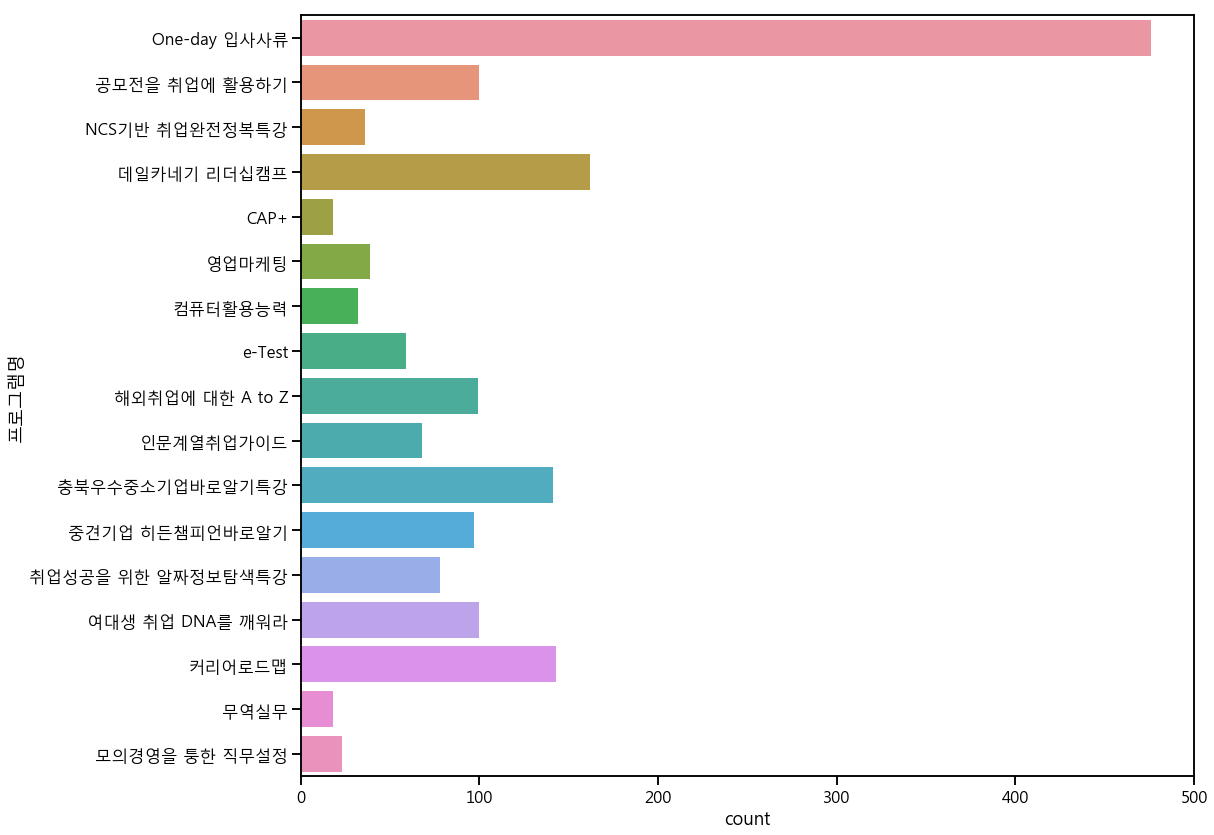

In [285]:
sns.countplot(y='프로그램명', data=df)

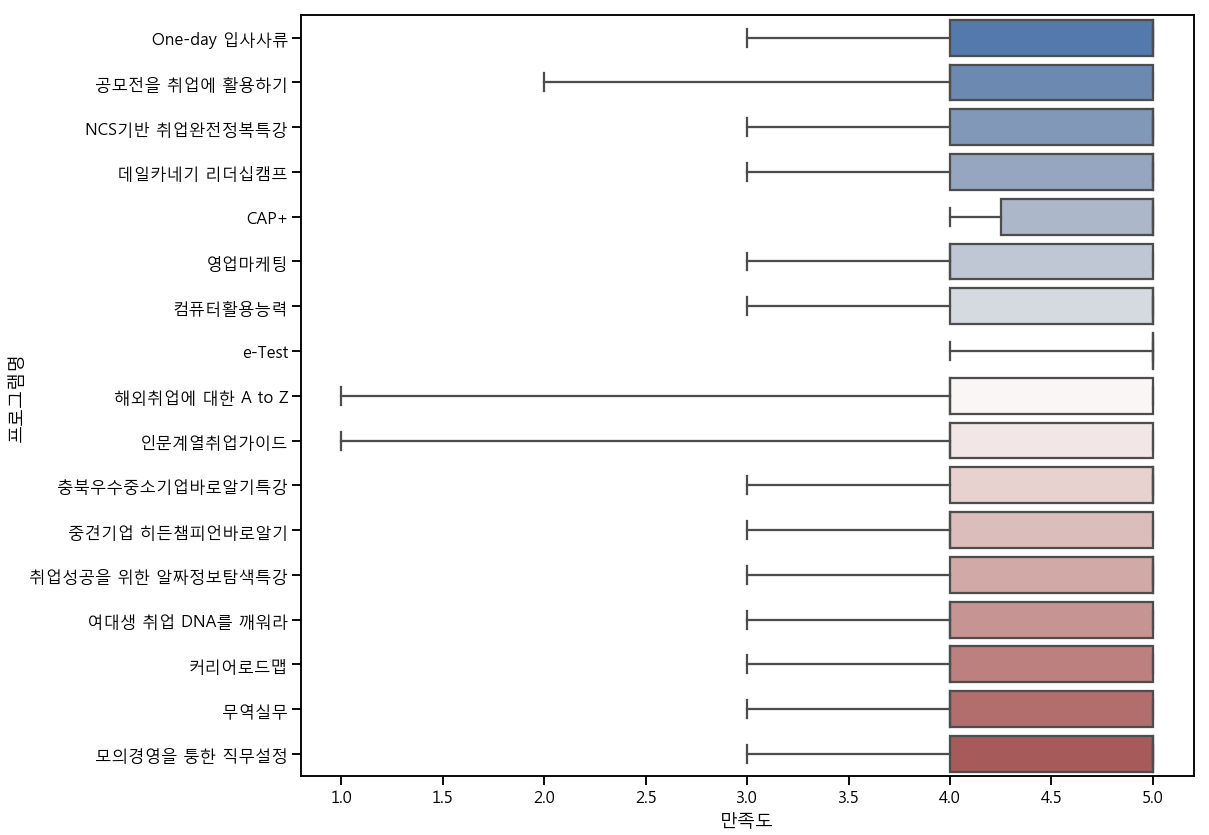

In [286]:
sns.boxplot(y='프로그램명', x = '만족도', data=df, whis="range", palette="vlag")

C:\Users\suer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\suer\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\suer\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


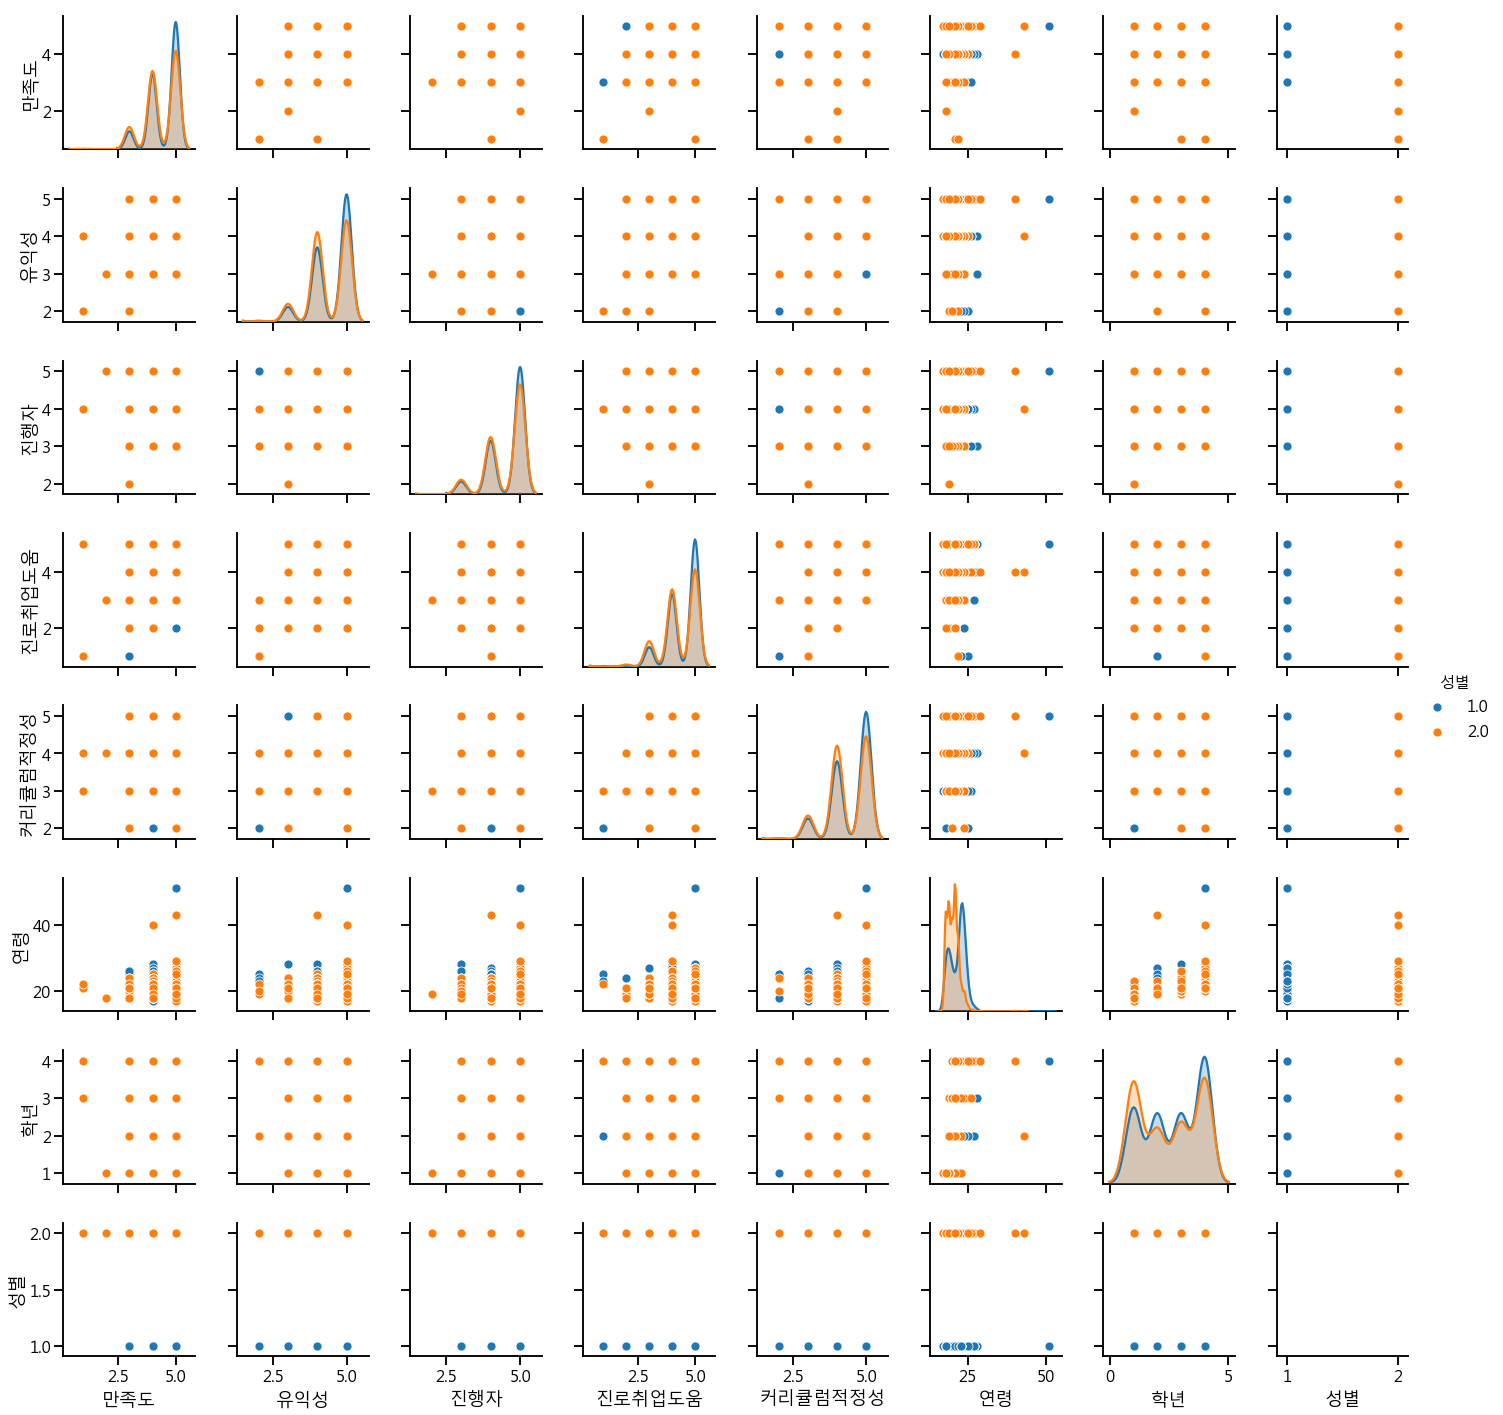

In [287]:
sns.pairplot(df, hue='성별')

In [288]:
#X = np.array(dfval.astype(float))

In [289]:
"""
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
"""    

'\nrange_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]\nfor n_clusters in range_n_clusters:\n    clusterer = KMeans(n_clusters=n_clusters, random_state=10)\n    cluster_labels = clusterer.fit_predict(X)\n    # The silhouette_score gives the average value for all the samples.\n    # This gives a perspective into the density and separation of the formed\n    # clusters\n    silhouette_avg = silhouette_score(X, cluster_labels)\n    print("For n_clusters =", n_clusters,\n          "The average silhouette_score is :", silhouette_avg)\n    # Compute the silhouette scores for each sample\n    sample_silhouette_values = silhouette_samples(X, cluster_labels)\n'